In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path = 'results/California_Housing/random_search_results_all_4bits.csv'
path = r'C:\Users\k_schr40\Downloads\wine_quality_hyperparameter_tuning_4bits_100steps.csv'
df = pd.read_csv(path)

In [4]:
df

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.0001,0.0001,6,256,50,0.0010,0.481910,0.516007,0.503664,0.510651,0.566398,0.591940,0.592837,0.494201,0.497274
1,0.0000,0.0001,3,2048,30,0.0001,0.484188,0.525667,0.499436,0.531117,0.602333,0.654082,0.654082,0.502196,0.502213
2,0.0001,0.0010,5,2048,30,0.0010,0.487762,0.514336,0.494607,0.644726,1.044871,0.573318,0.573284,0.550488,0.551118
3,0.0001,0.0010,6,4096,70,0.0010,0.491233,0.560014,0.513358,0.491118,0.596655,0.579788,0.581921,0.459077,0.459123
4,0.0000,0.0010,3,1024,30,0.0001,0.493237,0.539321,0.511334,0.518013,0.566353,0.558382,0.558385,0.510501,0.510437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0001,0.0010,4,512,70,0.0001,0.638593,0.781439,0.667992,0.600789,0.573663,0.672835,0.672834,0.570045,0.570387
96,0.0001,0.0010,3,4096,50,0.0010,0.640654,0.737275,0.678713,0.552692,0.665746,0.551819,0.553830,0.491842,0.492040
97,0.0000,0.0010,6,512,50,0.0010,0.678262,0.702068,0.693229,0.535246,0.522120,0.500280,0.500150,0.522487,0.523091
98,0.0000,0.0010,3,512,30,0.0010,0.681323,0.768712,0.692748,0.514197,0.594422,0.615399,0.616034,0.502744,0.502904


In [5]:
df.columns

Index(['weight_decay', 'learning_rate', 'hidden_layers', 'hidden_neurons',
       'num_epochs', 'decrease_factor', 'val_loss_mlp',
       'val_loss_hard_post_mlp', 'val_loss_hard_thr_post_mlp',
       'val_loss_hard_pre_mlp', 'val_loss_hard_thr_pre_mlp',
       'val_loss_soft_mlp', 'val_loss_soft_hard_mlp', 'val_loss_soft_comp_mlp',
       'val_loss_soft_hard_comp_mlp'],
      dtype='object')

In [6]:
loss_columns = [col for col in df.columns if 'loss' in col]

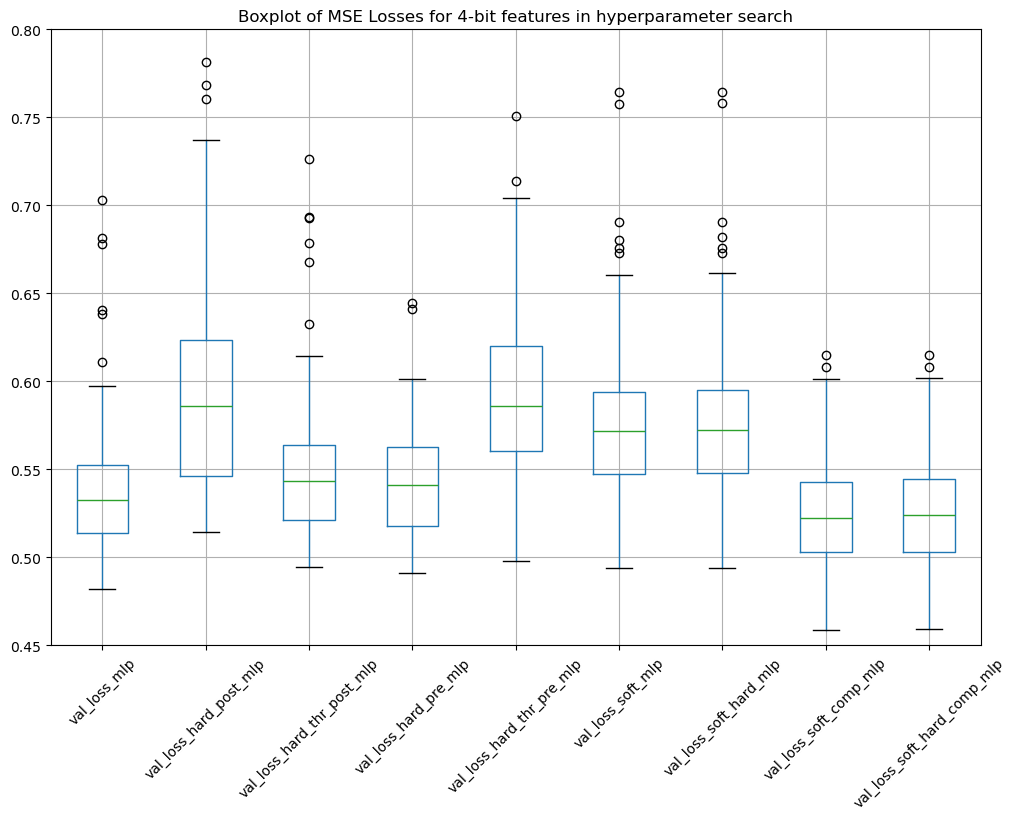

In [ ]:
df[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.45,0.8)
plt.title('Boxplot of MSE Losses for 4-bit features in hyperparameter search')
plt.show()

In [11]:
df[loss_columns].values.argmin(axis=0)

array([ 0, 15,  2,  3, 25, 77, 77,  3,  3], dtype=int64)

In [13]:
df.iloc[df[loss_columns].values.argmin(axis=0)]

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.0001,0.0001,6,256,50,0.0010,0.481910,0.516007,0.503664,0.510651,0.566398,0.591940,0.592837,0.494201,0.497274
15,0.0000,0.0001,6,128,50,0.0010,0.508696,0.514256,0.515187,0.501730,0.594030,0.598053,0.598413,0.511180,0.514135
2,0.0001,0.0010,5,2048,30,0.0010,0.487762,0.514336,0.494607,0.644726,1.044871,0.573318,0.573284,0.550488,0.551118
3,0.0001,0.0010,6,4096,70,0.0010,0.491233,0.560014,0.513358,0.491118,0.596655,0.579788,0.581921,0.459077,0.459123
25,0.0001,0.0010,6,128,50,0.0001,0.514021,0.565801,0.510264,0.535146,0.497918,0.521229,0.521229,0.490512,0.490477
77,0.0001,0.0010,4,2048,50,0.0001,0.556116,0.635690,0.574451,0.588074,0.525048,0.493806,0.493782,0.513527,0.513549
77,0.0001,0.0010,4,2048,50,0.0001,0.556116,0.635690,0.574451,0.588074,0.525048,0.493806,0.493782,0.513527,0.513549
3,0.0001,0.0010,6,4096,70,0.0010,0.491233,0.560014,0.513358,0.491118,0.596655,0.579788,0.581921,0.459077,0.459123
3,0.0001,0.0010,6,4096,70,0.0010,0.491233,0.560014,0.513358,0.491118,0.596655,0.579788,0.581921,0.459077,0.459123


In [42]:
mean_values = df.groupby(['hidden_layers', 'hidden_neurons'],as_index=False).min()




In [43]:
mean_values

,hidden_layers,hidden_neurons,weight_decay,learning_rate,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,3,128,0.0000,0.0001,30,0.0001,0.511496,0.531291,0.531379,0.517883,0.548897,0.516204,0.516217,0.492935,0.492939
1,3,256,0.0000,0.0001,30,0.0001,0.515738,0.527726,0.513264,0.518606,0.563912,0.596913,0.596913,0.526010,0.526095
2,3,512,0.0000,0.0001,30,0.0001,0.495310,0.527021,0.506461,0.513800,0.588676,0.543124,0.543134,0.485902,0.485653
3,3,1024,0.0000,0.0001,30,0.0001,0.493237,0.528941,0.511334,0.494213,0.561089,0.543581,0.543646,0.488849,0.493246
4,3,2048,0.0000,0.0001,30,0.0001,0.484188,0.525667,0.499436,0.531117,0.541773,0.535432,0.535432,0.502196,0.502213
5,3,4096,0.0000,0.0001,30,0.0001,0.494978,0.552824,0.512585,0.505192,0.563352,0.551819,0.553830,0.488568,0.492040
6,4,128,0.0000,0.0010,70,0.0001,0.513863,0.591685,0.535613,0.516981,0.562615,0.517517,0.517517,0.539679,0.539681
7,4,256,0.0000,0.0001,30,0.0001,0.496344,0.517589,0.502730,0.506099,0.562476,0.548482,0.549089,0.489658,0.489655
8,4,512,0.0000,0.0001,50,0.0001,0.510100,0.576252,0.528072,0.536181,0.573663,0.542423,0.542550,0.538111,0.539328
9,4,1024,0.0000,0.0001,30,0.0001,0.530220,0.572132,0.536425,0.518371,0.574968,0.546671,0.546681,0.498941,0.498941


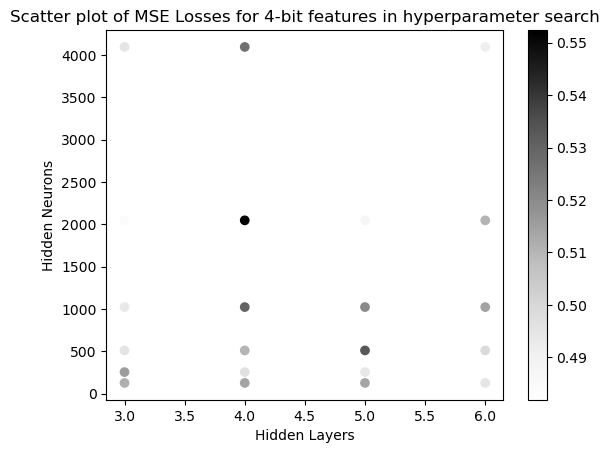

In [45]:
plt.scatter(mean_values['hidden_layers'], mean_values['hidden_neurons'], c = mean_values['val_loss_mlp'], cmap='Greys')
plt.colorbar()
plt.xlabel('Hidden Layers')
plt.ylabel('Hidden Neurons')
plt.title('Scatter plot of MSE Losses for 4-bit features in hyperparameter search')
plt.show()

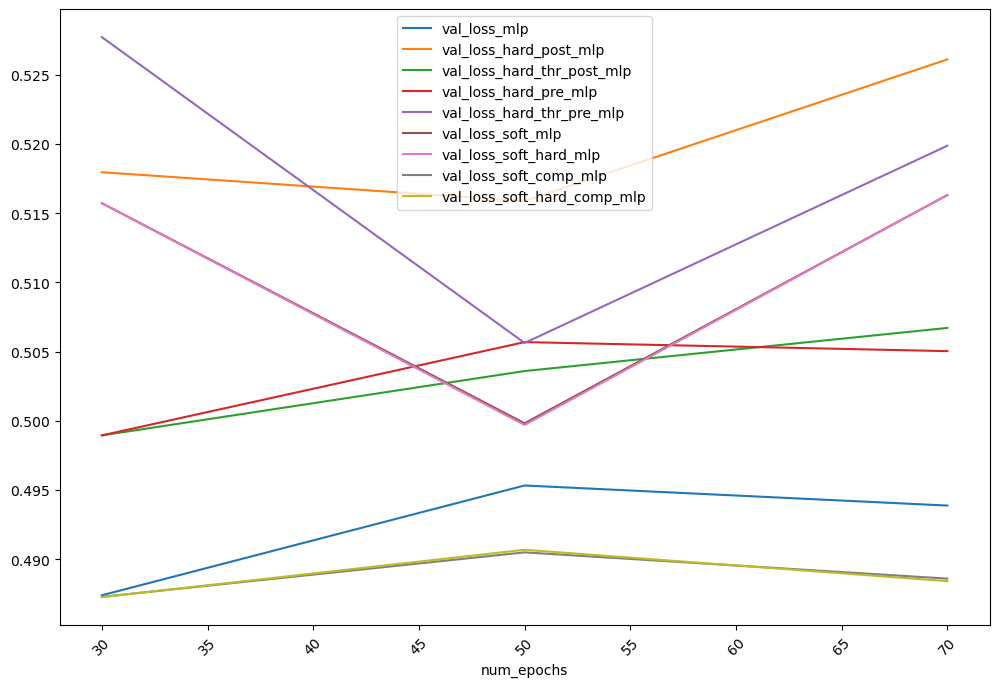

In [32]:
hyperparameter = 'num_epochs'
temp = df.groupby(hyperparameter).quantile(0.03) 
temp[loss_columns].plot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

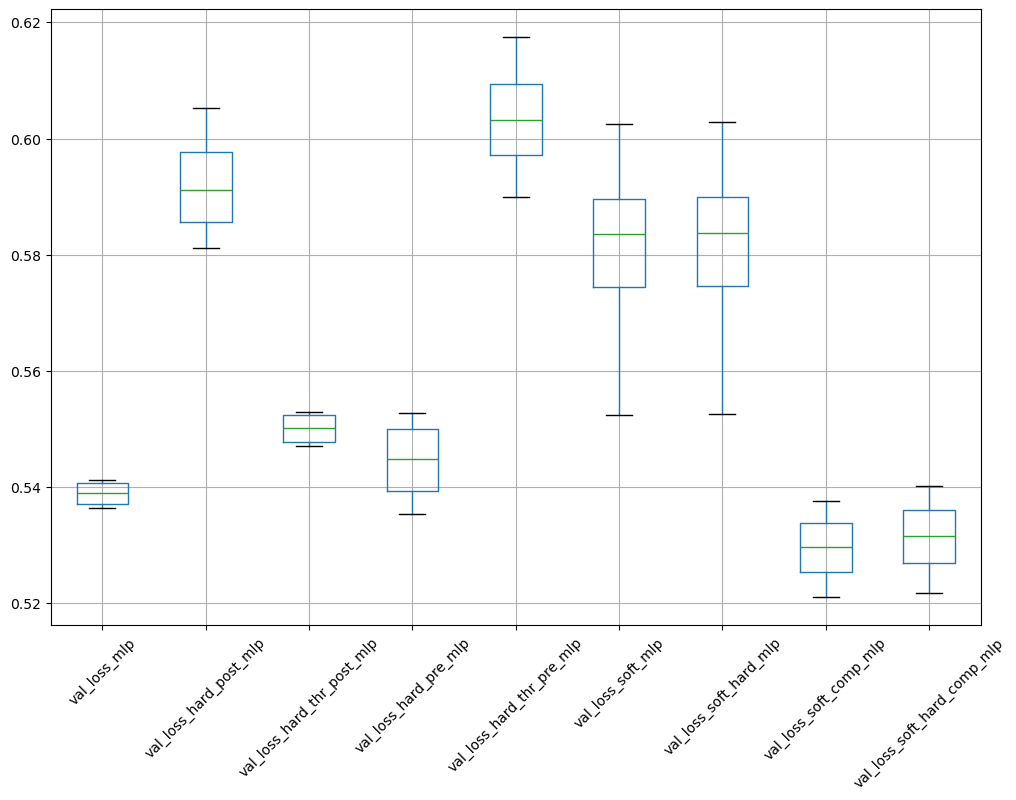

In [16]:
df.groupby('hidden_layers').mean().boxplot(column=loss_columns, figsize=(12, 8))
plt.xticks(rotation=45)
plt.show()

In [8]:
path = 'results/California_Housing/random_search_results_all_best_val_losses.csv'
df_8bit = pd.read_csv(path)

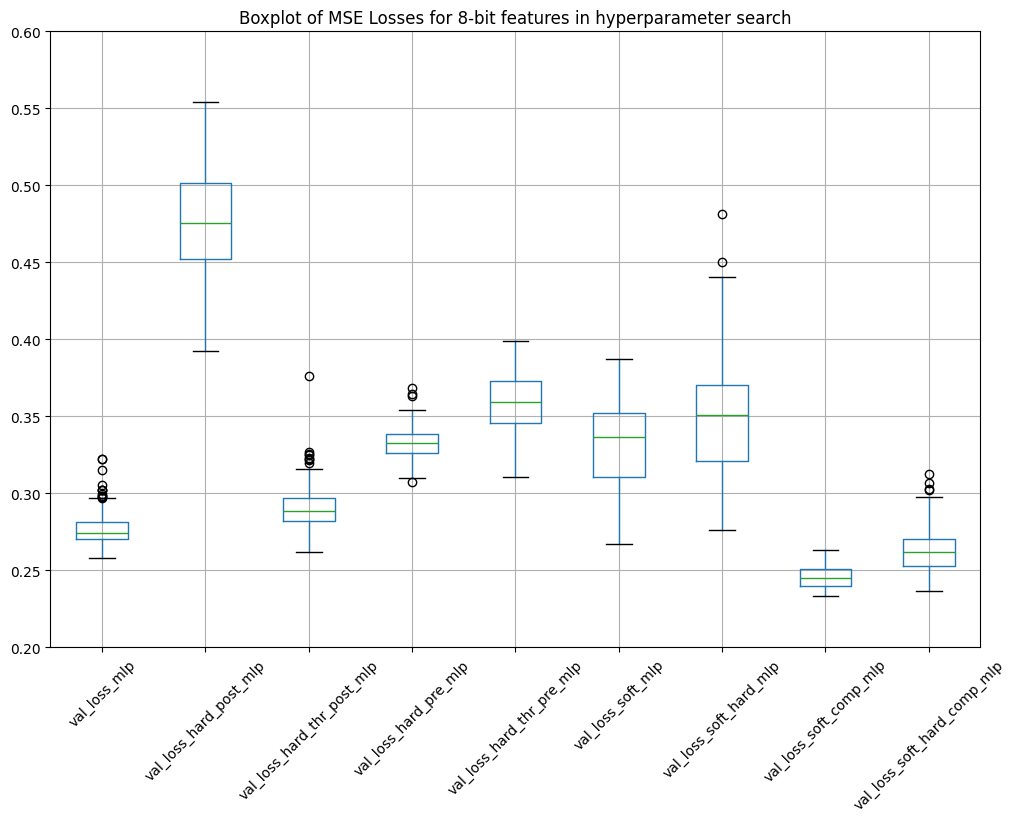

In [9]:
df_8bit[loss_columns].boxplot(figsize=(12, 8))
plt.xticks(rotation=45)
plt.ylim(0.2,0.6)
plt.title('Boxplot of MSE Losses for 8-bit features in hyperparameter search')
plt.show()

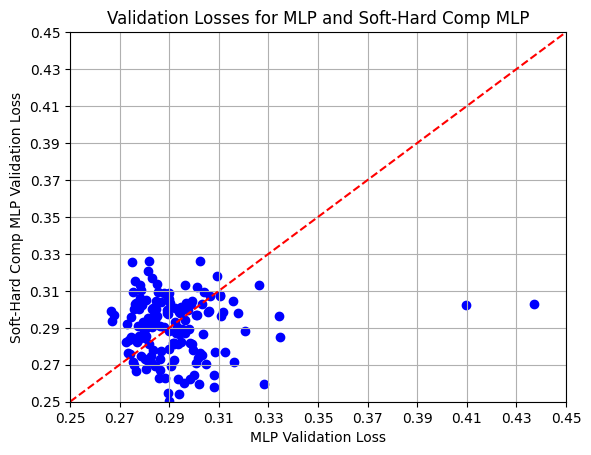

In [10]:
plt.scatter(df['val_loss_mlp'],df['val_loss_soft_hard_comp_mlp'], color = 'blue')
plt.title('Validation Losses for MLP and Soft-Hard Comp MLP')
plt.xlabel('MLP Validation Loss')
plt.ylabel('Soft-Hard Comp MLP Validation Loss')
plt.plot([0.25, 0.45], [0.25, 0.45], 'r--')
plt.xlim(0.25, 0.45)
plt.ylim(0.25, 0.45)
plt.xticks(np.arange(0.25, 0.46, 0.02))
plt.yticks(np.arange(0.25, 0.46, 0.02))
plt.grid()
plt.show()

In [11]:
df.sort_values(by='val_loss_soft_hard_comp_mlp', ascending=True, inplace=True)
df.head()

,weight_decay,learning_rate,hidden_layers,hidden_neurons,num_epochs,decrease_factor,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
80,0.0001,0.0001,3,512,30,0.0001,0.290065,3.366501,0.348661,0.471974,0.367236,0.361208,0.361303,0.250098,0.250121
95,0.0001,0.0001,3,256,70,0.0001,0.294113,4.240359,0.345758,0.461955,0.370191,0.311872,0.311925,0.254093,0.254110
74,0.0001,0.0001,6,256,30,0.0001,0.289634,3.627678,0.342577,0.472129,0.342614,0.334098,0.334158,0.254531,0.254766
130,0.0001,0.0001,5,128,30,0.0001,0.307900,2.297192,0.356555,0.464028,0.355181,0.328886,0.328835,0.257709,0.258060
119,0.0001,0.0001,4,256,30,0.0001,0.301930,3.747940,0.364537,0.459068,0.359097,0.330327,0.330452,0.259404,0.259589


## Evaluate best models

In [46]:
path = r'C:\Users\k_schr40\Downloads\wine_quality_best_models__4bits_2runs.csv'
best_models_df = pd.read_csv(path)

In [50]:
best_models_df

,val_loss_mlp,val_loss_hard_post_mlp,val_loss_hard_thr_post_mlp,val_loss_hard_pre_mlp,val_loss_hard_thr_pre_mlp,val_loss_soft_mlp,val_loss_soft_hard_mlp,val_loss_soft_comp_mlp,val_loss_soft_hard_comp_mlp
0,0.528426,0.552391,0.480892,0.499182,0.503851,0.508214,0.522043,0.484338,0.498590
1,0.510944,0.529253,0.492018,0.509021,0.497592,0.501464,0.506465,0.472382,0.476525


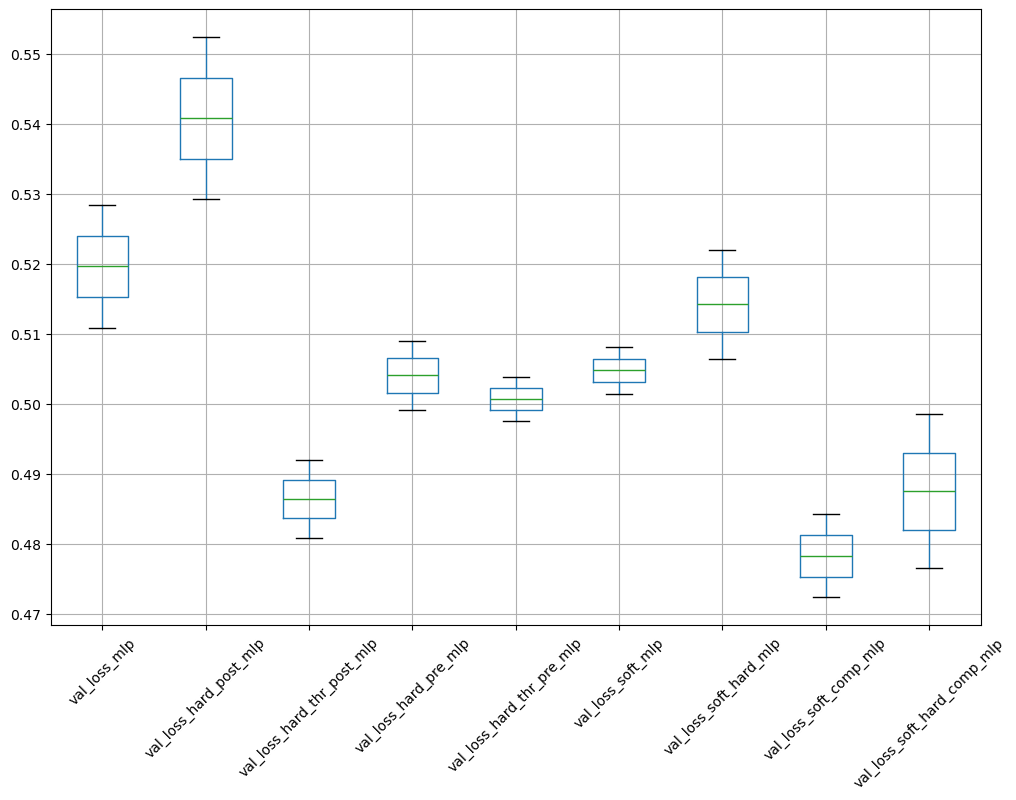

In [51]:
plt.figure(figsize=(12, 8))
best_models_df.boxplot()
plt.xticks(rotation=45)
plt.show()